In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import seaborn as sns
sns.set_style("dark")
from sklearn import preprocessing
from scipy.stats import skew, boxcox
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
df = pd.read_csv('loans_full_schema.csv')

In [ ]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
df.describe()


,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.

In [ ]:
df.info


<bound method DataFrame.info of                     emp_title  emp_length  ... paid_interest paid_late_fees
0     global config engineer          3.0  ...       1015.19            0.0
1      warehouse office clerk        10.0  ...        150.49            0.0
2                    assembly         3.0  ...        106.43            0.0
3            customer service         1.0  ...        566.15            0.0
4        security supervisor         10.0  ...        754.80            0.0
...                       ...         ...  ...           ...            ...
9995                   owner         10.0  ...        556.14            0.0
9996                 director         8.0  ...        603.75            0.0
9997                toolmaker        10.0  ...       2238.45            0.0
9998                  manager         1.0  ...        391.43            0.0
9999       operations analyst         3.0  ...        433.39            0.0

[10000 rows x 55 columns]>

In [ ]:
df.isna().sum().sort_values(ascending=False)

verification_income_joint           8545
annual_income_joint                 8505
debt_to_income_joint                8505
months_since_90d_late               7715
months_since_last_delinq            5658
months_since_last_credit_inquiry    1271
emp_title                            833
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
sub_grade                              0
initial_listing_status                 0
loan_status                            0
num_historical_failed_to_pay           0
num_collections_last_12m               0
total_credit_utilized                  0
total_credit_limit                     0
open_credit_lines                      0
total_credit_lines                     0
inquiries_last_12m                     0
earliest_credit_line                   0
delinq_2y                              0
grade                                  0
disbursement_method                    0
balance         

In [ ]:
#removing emp_title, state , num_accounts_120d_past_due , num_accounts_30d_past_due, tax_liens, public_record_bankrupt, 
#paid_late_fees , total_collection_amount_ever , current_accounts_delinq , num_historical_failed_to_pay
# num_collections_last_12m, delinq_2y

In [ ]:
df.drop(columns=['emp_title', 'state' , 'num_accounts_120d_past_due' , 'num_accounts_30d_past_due', 'tax_liens', 'public_record_bankrupt', 
'paid_late_fees' , 'total_collection_amount_ever' , 'current_accounts_delinq' , 'num_historical_failed_to_pay'])

,emp_length,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,months_since_90d_late,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest
0,3.0,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,38.0,2,5,5.0,10,2,11100,14,8,6,1,92.9,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19
1,10.0,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,NaN,0,11,8.0,14,3,16500,24,14,4,0,100.0,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49
2,3.0,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,28.0,1,13,7.0,10,3,4300,14,8,6,0,93.5,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43
3,1.0,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,NaN,1,1,15.0,4,2,19400,3,3,2,0,100.0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15
4,10.0,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,NaN,1,6,4.0,16,10,32700,20,15,13,0,100.0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,NaN,3,8,6.0,13,4,44600,22,9,4,1,100.0,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14
9996,8.0,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,9.0,3,0,1.0,15,5,28200,18,11,8,2,82.1,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75
9997,10.0,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,NaN,3,4,16.0,11,5,14900,9,7,5,2,72.2,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45
9998,1.0,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,NaN,2,2,5.0,15,1,46000,15,9,2,6,100.0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43


In [ ]:

print(df['emp_length'].mean())
print(df['emp_length'].median())
df['emp_length'].fillna(df['emp_length'].median(),inplace=True)

5.930306000217794
6.0


In [ ]:

print(df['debt_to_income'].mean())
print(df['debt_to_income'].median())
df['debt_to_income'].fillna(df['debt_to_income'].mean(),inplace=True)

19.308191659983976
17.57


In [ ]:
df_1 = df.isin([0]).sum(axis=0).sort_values(ascending = False)
df_1


current_accounts_delinq             9999
num_accounts_30d_past_due           9999
paid_late_fees                      9948
num_collections_last_12m            9873
tax_liens                           9754
num_accounts_120d_past_due          9682
public_record_bankrupt              8785
total_collection_amount_ever        8635
num_historical_failed_to_pay        8586
delinq_2y                           8576
num_mort_accounts                   4484
inquiries_last_12m                  3060
current_installment_accounts        1414
months_since_last_credit_inquiry     693
emp_length                           690
accounts_opened_24m                  527
balance                              455
num_active_debit_accounts            333
total_debit_limit                    135
num_cc_carrying_balance              125
debt_to_income                        28
total_credit_utilized                 28
annual_income                         23
paid_interest                         18
paid_total      

In [ ]:
cols_to_remove = pd.DataFrame(df_1).reset_index()['index'][:10]
df.drop(columns = cols_to_remove,inplace=True)

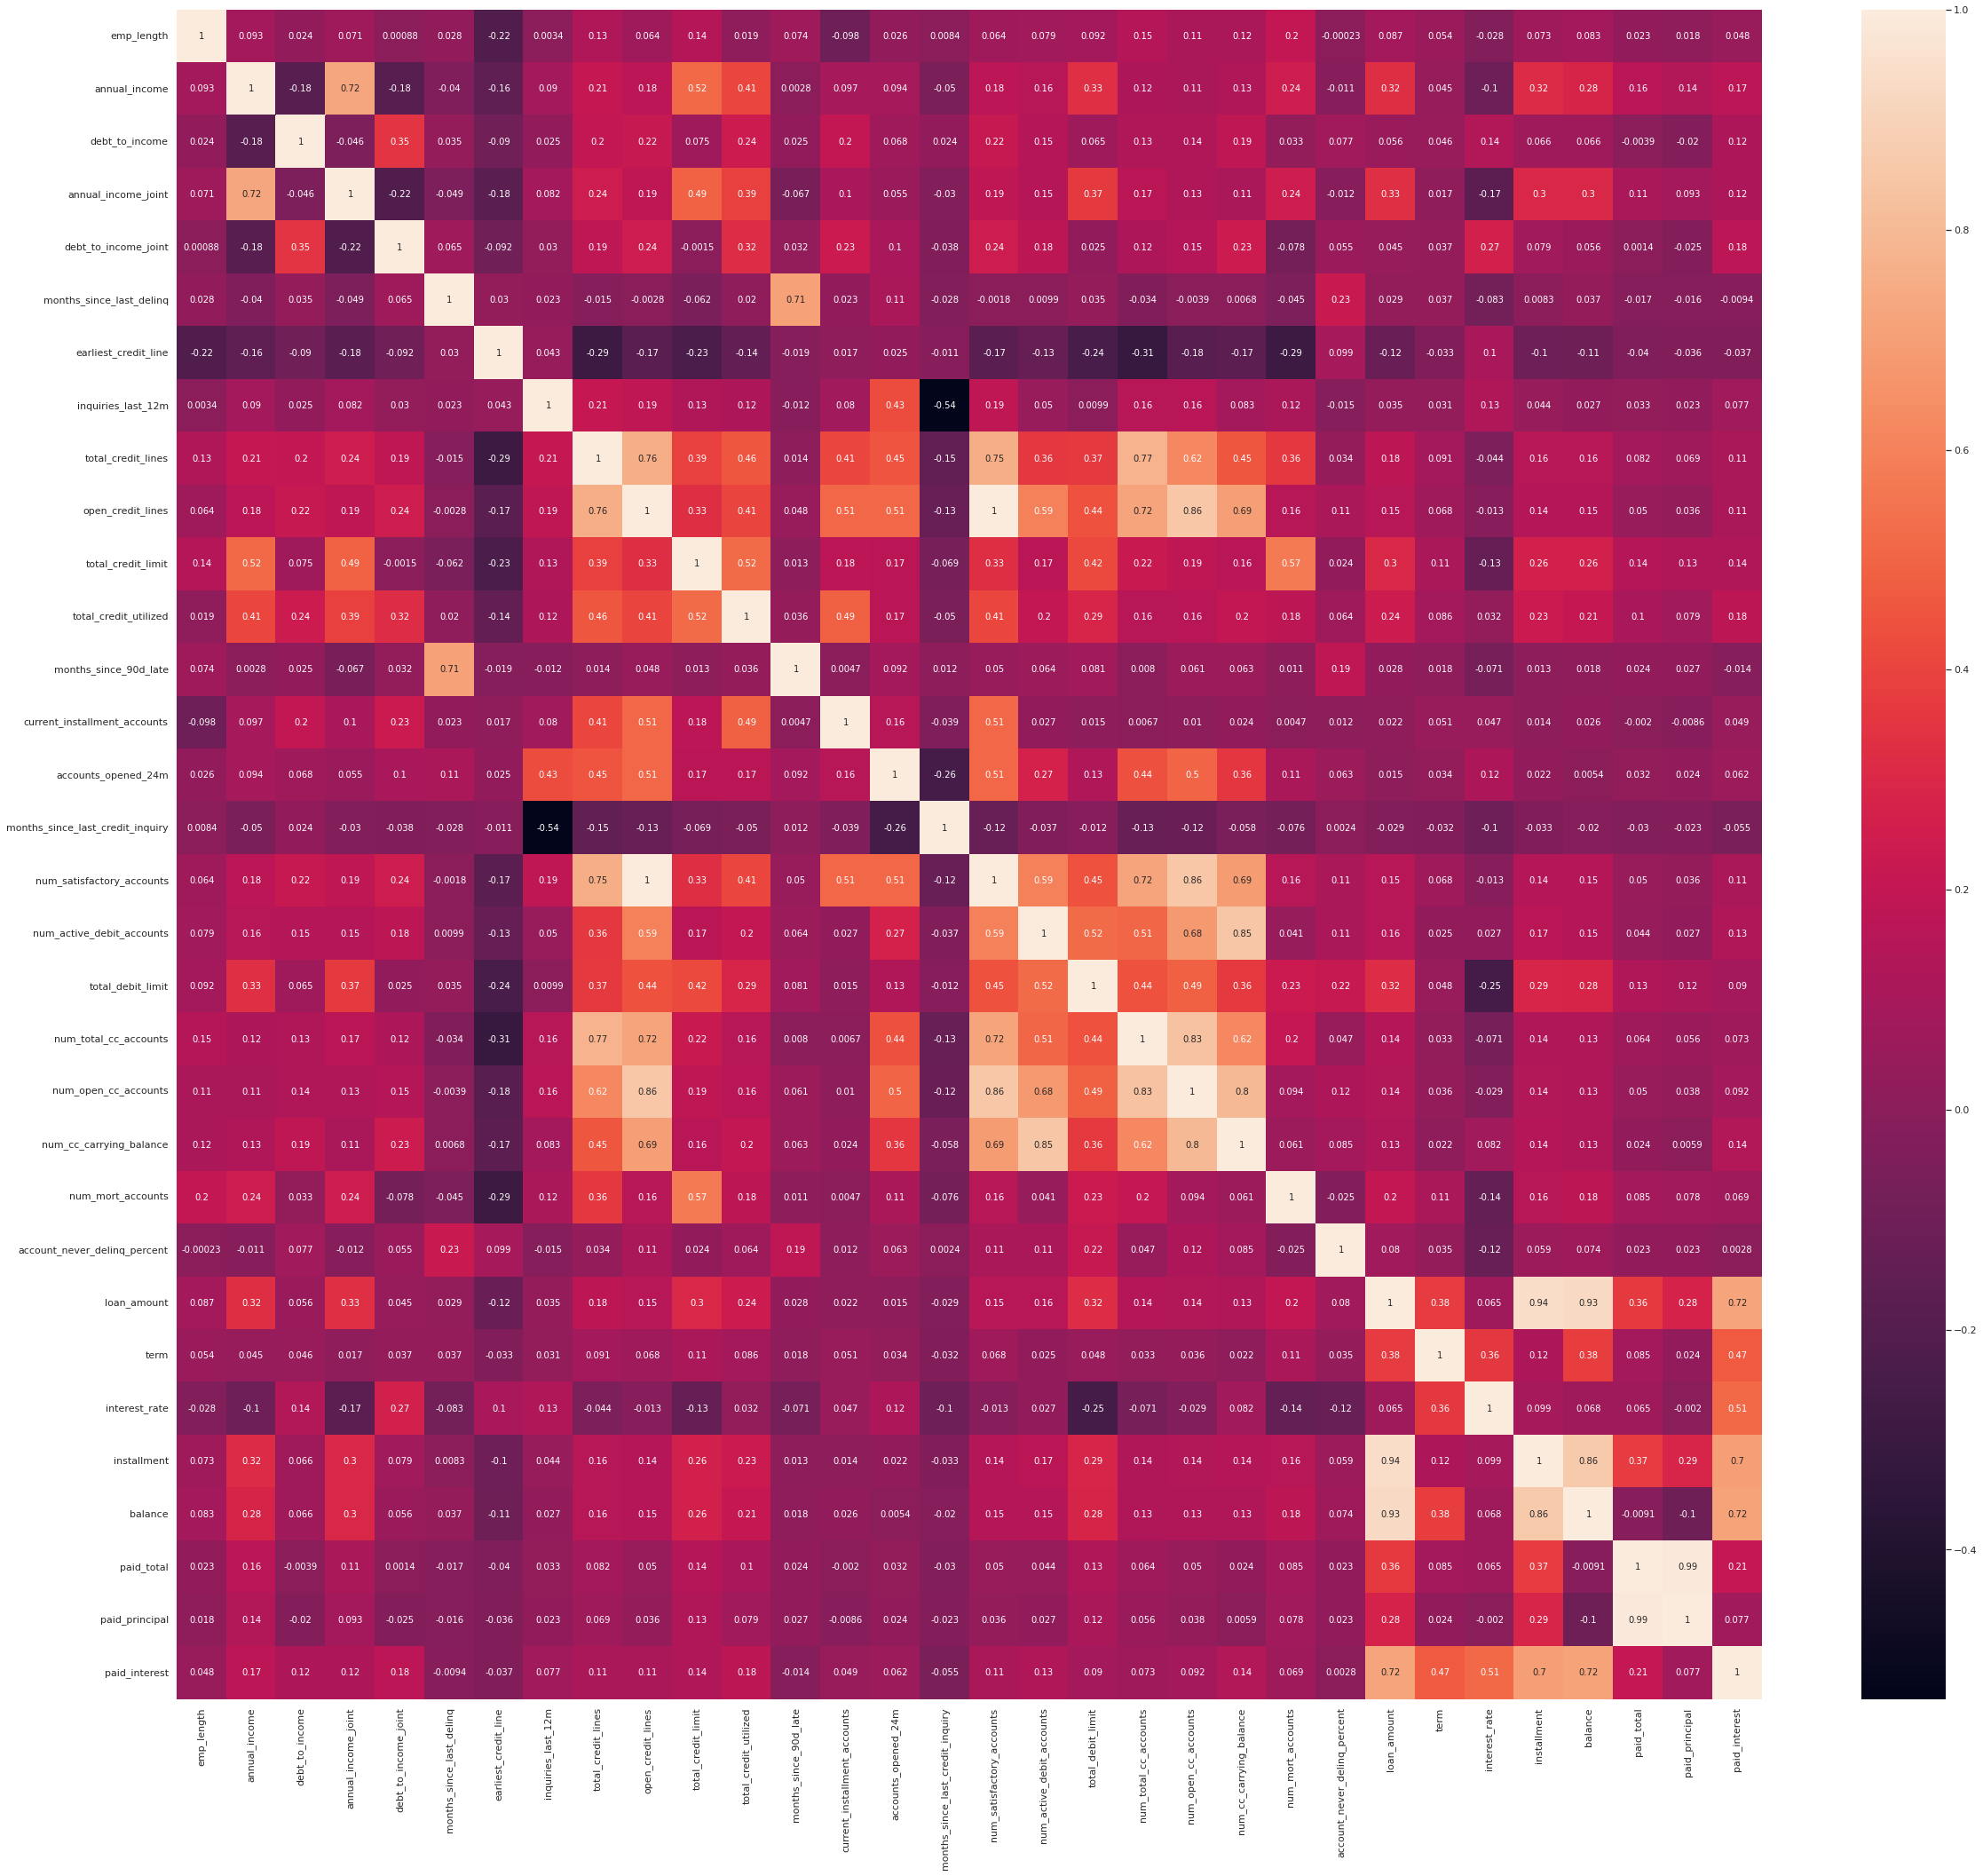

                                  emp_length  ...  paid_interest
emp_length                          1.000000  ...       0.047673
annual_income                       0.093301  ...       0.174154
debt_to_income                      0.024123  ...       0.121062
annual_income_joint                 0.070877  ...       0.120788
debt_to_income_joint                0.000879  ...       0.177931
months_since_last_delinq            0.027541  ...      -0.009362
earliest_credit_line               -0.215469  ...      -0.037027
inquiries_last_12m                  0.003412  ...       0.077204
total_credit_lines                  0.127913  ...       0.112342
open_credit_lines                   0.064477  ...       0.112090
total_credit_limit                  0.143134  ...       0.135300
total_credit_utilized               0.018632  ...       0.181088
months_since_90d_late               0.074122  ...      -0.013995
current_installment_accounts       -0.097907  ...       0.049237
accounts_opened_24m      

account_never_delinq_percent  emp_length                   0.000232
emp_length                    debt_to_income_joint         0.000879
debt_to_income_joint          paid_total                   0.001389
total_credit_limit            debt_to_income_joint         0.001495
months_since_last_delinq      num_satisfactory_accounts    0.001780
                                                             ...   
loan_amount                   balance                      0.926557
installment                   loan_amount                  0.944517
paid_total                    paid_principal               0.991473
open_credit_lines             num_satisfactory_accounts    0.999481
emp_length                    emp_length                   1.000000
Length: 497, dtype: float64

In [ ]:
plt.figure(figsize=(40,35))
sns.heatmap(df.corr(), annot = True)
plt.show()
print(df.corr())
df.corr().abs().unstack().sort_values(kind="quicksort").drop_duplicates()

#EDA

Text(0.5, 1.0, 'Loan Amount Distribution')

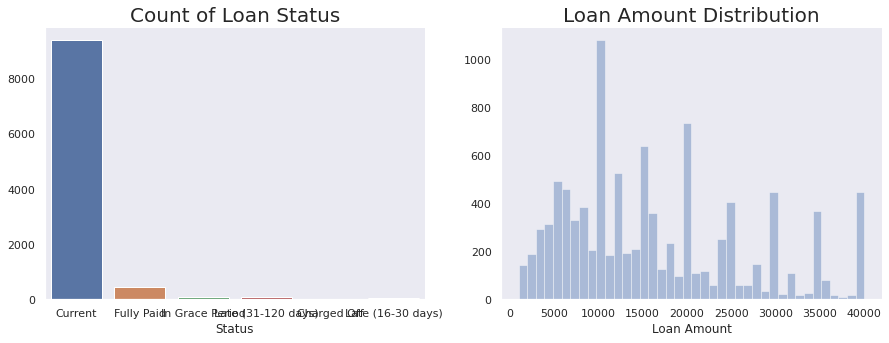

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=df, ax=axes[0])
sns.distplot(df['loan_amount'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

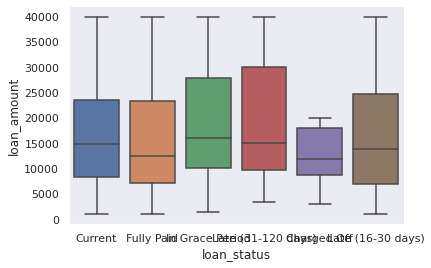

In [ ]:
sns.boxplot(x='loan_status', y='loan_amount', data=df)
sns.despine()

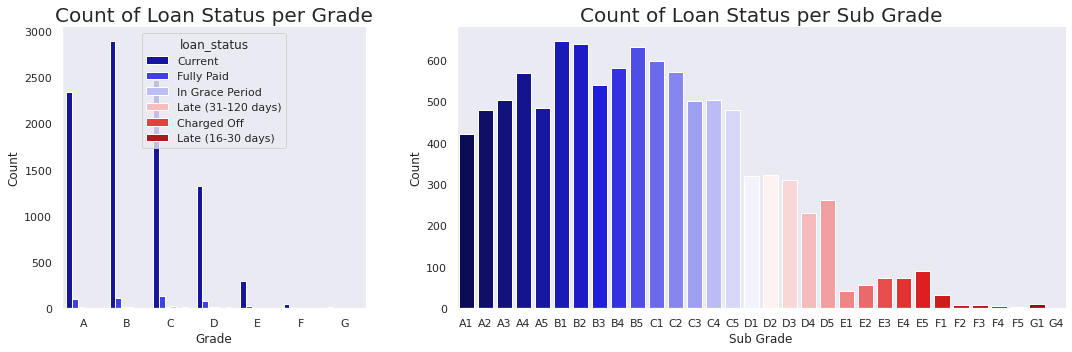

In [ ]:

f, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', data=df, order=sorted(df['grade'].unique()), palette='seismic', ax=axes[0])
sns.countplot(x='sub_grade', data=df, palette='seismic', order=sorted(df['sub_grade'].unique()), ax=axes[1])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()

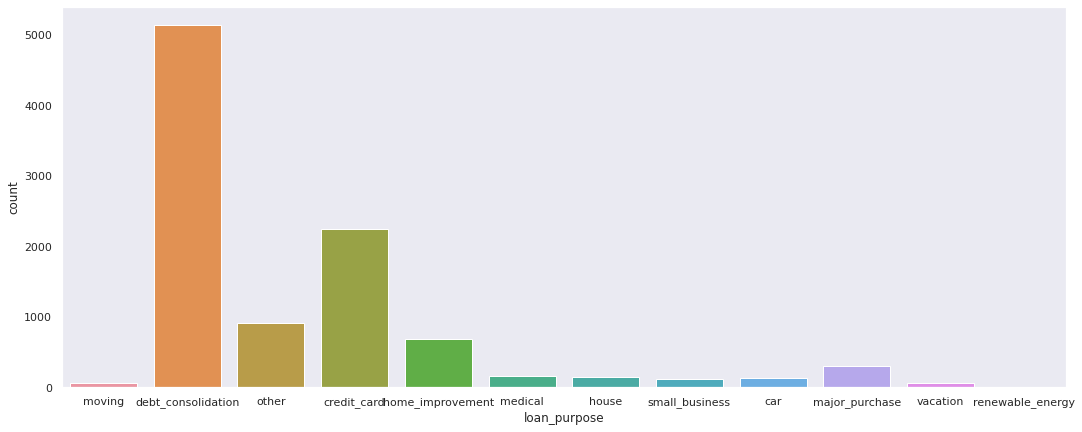

In [ ]:
plt.figure(figsize=(18,7))
sns.countplot(x="loan_purpose", data=df)
plt.show() # looks like debt consolidation is the main reason for people taking loans.


In [ ]:
df['application_type'].value_counts()


individual    8505
joint         1495
Name: application_type, dtype: int64

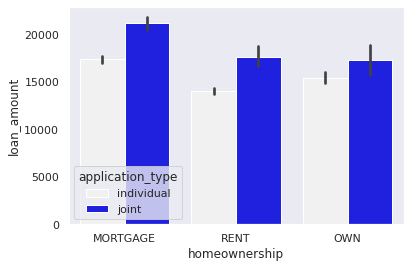

In [ ]:
sns.barplot(x = 'homeownership', y = 'loan_amount', hue = 'application_type',data = df, color = 'blue')

In [ ]:
df.describe().transpose() # the stats of all the columns


,count,mean,std,min,25%,50%,75%,max
emp_length,10000.0,5.936000,3.549248,0.00,3.0000,6.000,10.0000,1.000000e+01
annual_income,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
debt_to_income,10000.0,19.308192,14.986833,0.00,11.0675,17.600,24.9900,4.690900e+02
earliest_credit_line,10000.0,2001.290000,7.795510,1963.00,1997.0000,2003.000,2006.0000,2.015000e+03
inquiries_last_12m,10000.0,1.958200,2.380130,0.00,0.0000,1.000,3.0000,2.900000e+01
total_credit_lines,10000.0,22.679600,11.885439,2.00,14.0000,21.000,29.0000,8.700000e+01
open_credit_lines,10000.0,11.404400,5.868280,0.00,7.0000,10.000,14.0000,5.100000e+01
total_credit_limit,10000.0,183606.230400,187632.707777,0.00,51593.7500,114667.000,267550.0000,3.386034e+06
total_credit_utilized,10000.0,51049.063100,53636.731172,0.00,19185.5000,36927.000,65421.0000,9.424560e+05
current_installment_accounts,10000.0,2.663600,2.935387,0.00,1.0000,2.000,3.0000,3.500000e+01


In [ ]:
df.groupby('loan_status')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,7.0,12642.857143,6407.770580,3000.0,8750.0,12000.0,18000.0,20000.0
Current,9375.0,16366.456000,10281.475105,1000.0,8300.0,14800.0,23587.5,40000.0
Fully Paid,447.0,15590.659955,10505.902183,1000.0,7100.0,12600.0,23475.0,40000.0
In Grace Period,67.0,18614.552239,9871.892635,1550.0,10250.0,16100.0,28000.0,40000.0
Late (16-30 days),38.0,16725.657895,11891.975046,1000.0,7000.0,14000.0,24750.0,40000.0
Late (31-120 days),66.0,18839.772727,11116.572847,3500.0,9700.0,15000.0,30000.0,40000.0


In [ ]:
df['months_since_last_credit_inquiry'].fillna(int(df['months_since_last_credit_inquiry'].mean()), inplace=True)

In [ ]:
df['loan_status'].value_counts()


Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

In [ ]:
target_list = [1 if i=='Fully Paid' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts() # we have a target variable for loan status

0    9553
1     447
Name: TARGET, dtype: int64

In [ ]:
df.drop('loan_status',axis=1,inplace=True) # we do not need loan status column now.

In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
# Shows the list of columns with categorical values .

emp_title                 4741
state                       50
homeownership                3
verified_income              3
loan_purpose                12
application_type             2
grade                        7
sub_grade                   32
issue_month                  3
initial_listing_status       2
disbursement_method          2
dtype: int64

In [ ]:
#we can drop state and grade as they have high number of categorical values
df.drop('state',axis = 1, inplace= True)
df.drop('sub_grade', axis = 1, inplace= True)


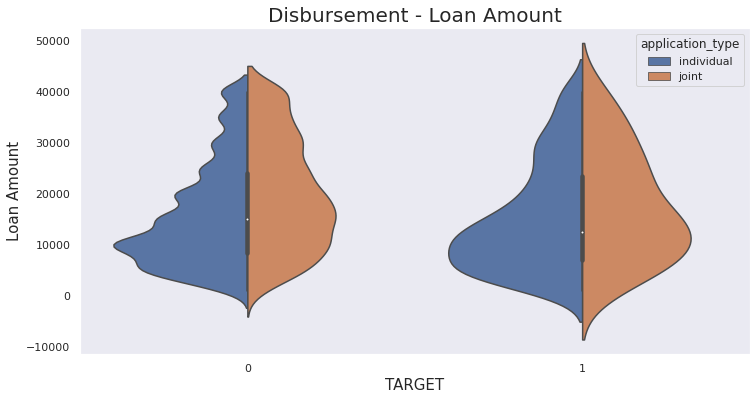

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amount",data=df, hue = "application_type",split=True)
plt.title("Disbursement - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [ ]:
df.corr()['debt_to_income'].sort_values().tail(10)
#It can be seen that the interest rate is also highly positively correlated 
#with the debt to income ratio.

num_open_cc_accounts            0.135943
interest_rate                   0.141393
num_active_debit_accounts       0.147349
num_cc_carrying_balance         0.189665
total_credit_lines              0.198489
current_installment_accounts    0.200385
num_satisfactory_accounts       0.216831
open_credit_lines               0.216908
total_credit_utilized           0.238072
debt_to_income                  1.000000
Name: debt_to_income, dtype: float64

In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


emp_title                 4741
homeownership                3
verified_income              3
loan_purpose                12
application_type             2
grade                        7
issue_month                  3
initial_listing_status       2
disbursement_method          2
dtype: int64

In [ ]:
grade_dummies = pd.get_dummies(df['grade'],drop_first=True)
df = pd.concat([df.drop('grade',axis=1),grade_dummies],axis=1)
# we will convert the grade column to dummy variables and drop it.

In [ ]:
loan_purpse_dummies = pd.get_dummies(df['loan_purpose'],drop_first=True)
df = pd.concat([df.drop('loan_purpose',axis=1),loan_purpse_dummies],axis=1)
# we will convert the loan purpose to dummy variables and drop it.

In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


emp_title                 4741
homeownership                3
verified_income              3
application_type             2
issue_month                  3
initial_listing_status       2
disbursement_method          2
dtype: int64

In [ ]:
df['verified_income'].value_counts()
 # we can change the verified income values to verified and not verified

Source Verified    4116
Not Verified       3594
Verified           2290
Name: verified_income, dtype: int64

In [ ]:
df['verified_income'] = df['verified_income'].replace(['Source Verified', 'Verified'], 'S_Verified')
dummies = pd.get_dummies(df['verified_income'],drop_first=True)
df = df.drop('verified_income',axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
dummies = pd.get_dummies(df[['homeownership', 'application_type','initial_listing_status','disbursement_method']], drop_first=True)

df = df.drop(['homeownership', 'application_type','initial_listing_status','disbursement_method'],axis=1)

df = pd.concat([df,dummies],axis=1)

In [ ]:
df['issue_month'].value_counts()


Mar-2018    3617
Jan-2018    3395
Feb-2018    2988
Name: issue_month, dtype: int64

In [ ]:
df.drop('issue_month', axis = 1, inplace = True)

In [ ]:
df['TARGET'].value_counts()


0    9553
1     447
Name: TARGET, dtype: int64

#Prediction Model



In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression

In [ ]:
# Features
X = df[['interest_rate','paid_total','paid_principal','accounts_opened_24m','total_credit_lines','total_credit_limit','num_mort_accounts','inquiries_last_12m']].values

# Label
y = df['TARGET'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:

# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 0.0007196856730011522}


Accuracy: 0.9904

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2381
           1       0.89      0.92      0.90       119

    accuracy                           0.99      2500
   macro avg       0.94      0.96      0.95      2500
weighted avg       0.99      0.99      0.99      2500


Average 5-Fold CV Score: 0.9553 , Standard deviation: 0.0002


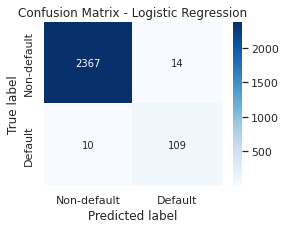

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.model_selection import cross_val_score

LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
model =[]

In [ ]:
model_lasso = Lasso(alpha=.01)
model_lasso.fit(X_train, y_train)
mae = mean_absolute_error(y_test , model_lasso.predict(X_test))
model.append(['Lasso Regression', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 0.051335791524345635


In [ ]:

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)
mae = mean_absolute_error(y_test , model_ridge.predict(X_test))
model.append(['Ridge Regression', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 0.05190259380267024
